# 03 - Análise gráfica - Kaggle Titanic

Conjunto de análises gráficas dos dados de treino do Titanic após a realização dos tratamentos dos mesmos.

## Preparando o ambiente

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcParams['figure.figsize'] = (12, 7)
sns.set(style='darkgrid')

## Carregando dados

In [3]:
titanic = pd.read_csv('https://raw.githubusercontent.com/SalatielBairros/kaggle-titanic/main/data/processed/train_processed_byage.csv')
del titanic['Unnamed: 0']
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Floor,Embarked,Relateds,faixa_etaria
0,0,3,male,22,1,0,SC,S,1,jovem_adulto
1,0,3,male,22,0,0,SC,C,0,jovem_adulto
2,0,3,male,22,0,0,SC,S,0,jovem_adulto
3,0,3,male,22,0,0,SC,S,0,jovem_adulto
4,0,3,male,22,0,0,SC,S,0,jovem_adulto


## Análise individual

### Sobreviventes

Começo com a contagem geral da proporção de sobreviventes na base de teste.

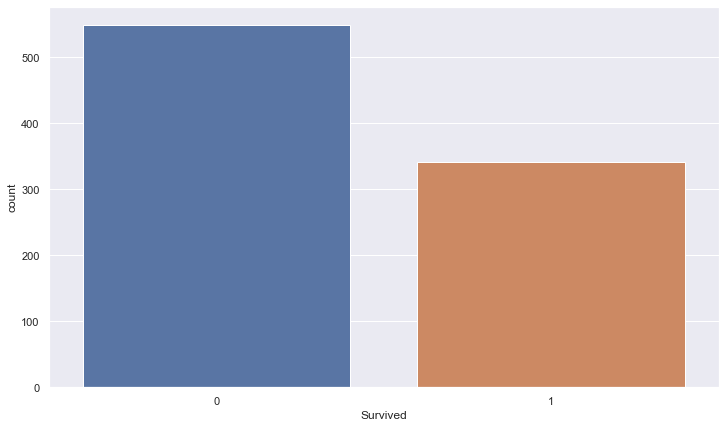

In [4]:
sns.countplot(x = 'Survived', data=titanic);

A maior parte das pessoas dessa base de dados não sobreviveu ao acidente, mas ainda assim foram vários os sobreviventes.

### Classe

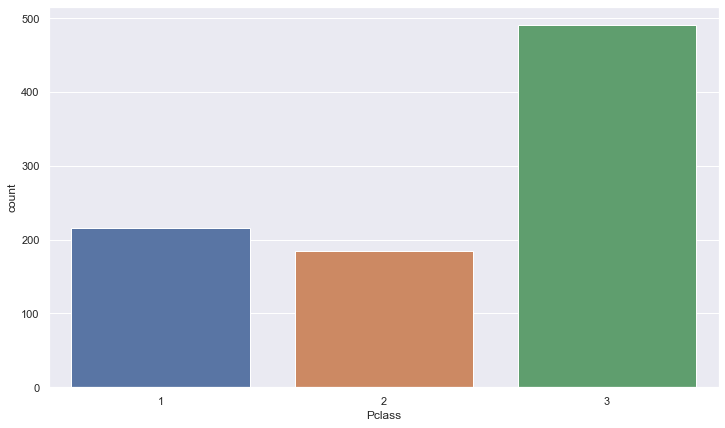

In [5]:
sns.countplot(x = 'Pclass', data=titanic);

A terceira classe possuía pouco mais pessoas que a primeira e segunda combinadas.

### Sexo

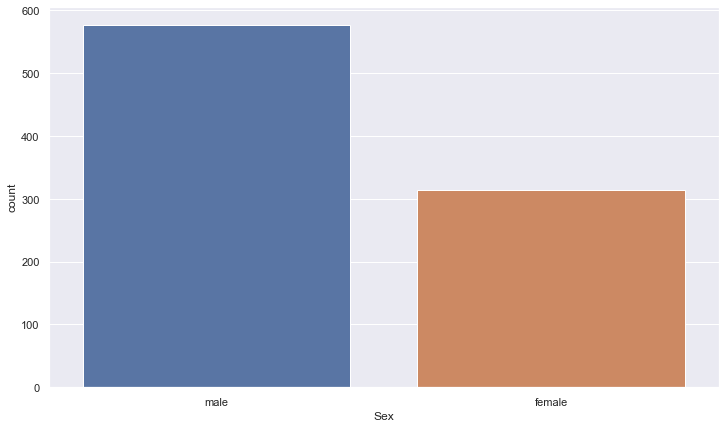

In [6]:
sns.countplot(x = 'Sex', data=titanic);

A maior parte dos integrantes do navio eram homens mas já sabemos que a maioria dos sobreviventes eram mulheres.

### Idade

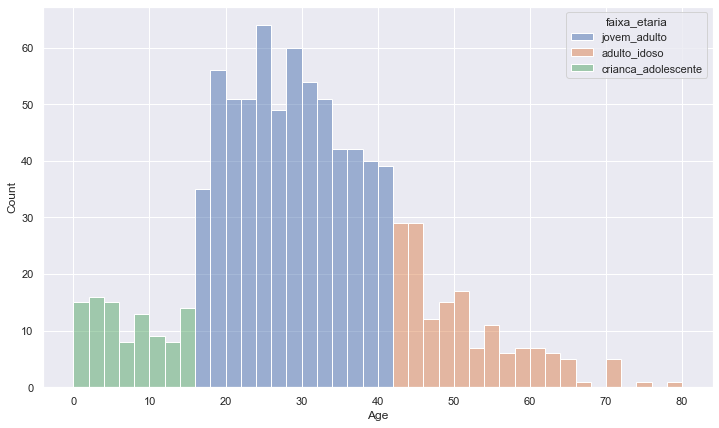

In [7]:
sns.histplot(x='Age', data=titanic, hue='faixa_etaria', bins=40);

A maior parte dos passageiros tinha entre 20 e 45 anos.

### Faixa etária

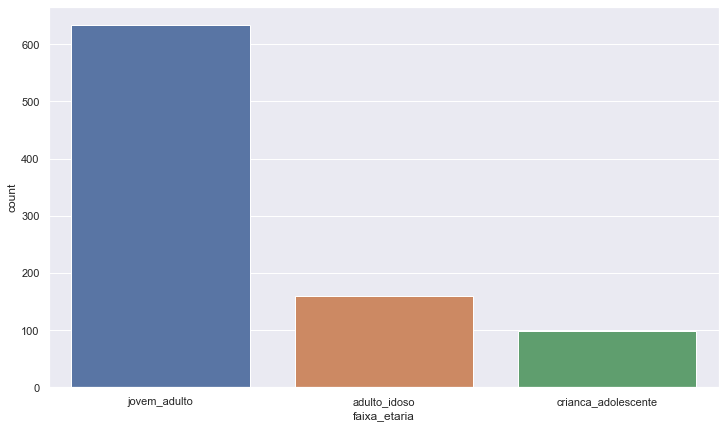

In [8]:
sns.countplot(x = 'faixa_etaria', data=titanic);

### SibSp

Corresponde ao número de irmãos e cônjuges a bordo. Não considera noivos, namorados ou semelhantes, apenas casados.

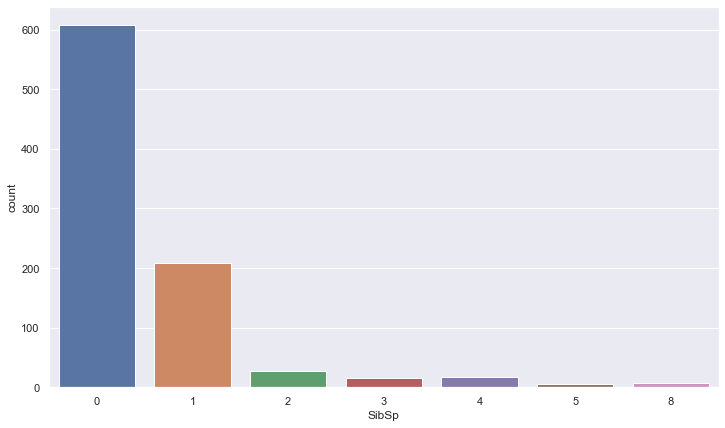

In [9]:
sns.countplot(x='SibSp', data=titanic);

### Parch

Corresponde ao número de pais e filhos acompanhando o passageiro.

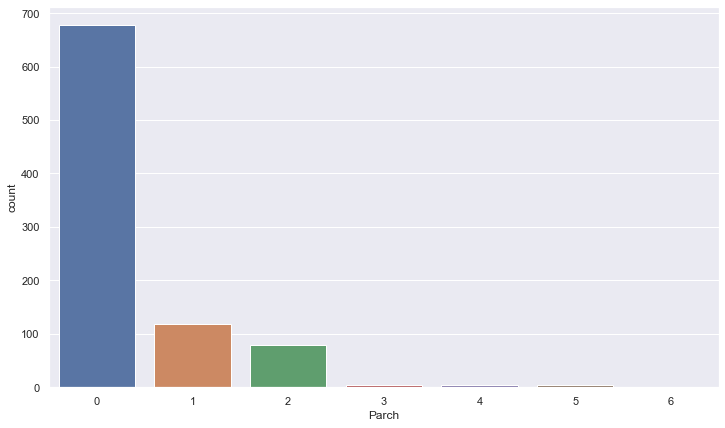

In [10]:
sns.countplot(x='Parch', data=titanic);

### Número total de parentes

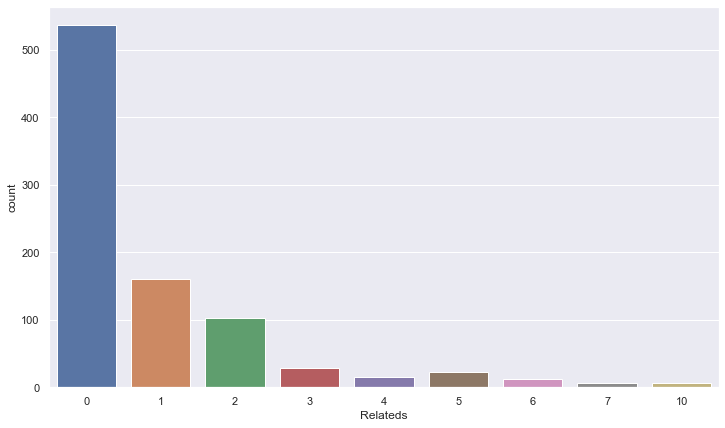

In [11]:
sns.countplot(x='Relateds', data=titanic);

É notável a quantidade de pessoas que estavam sozinhas no navio. O que acontece se compararmos as pessoas sozinhas versos a todas com pelo menos algum acompanhante?

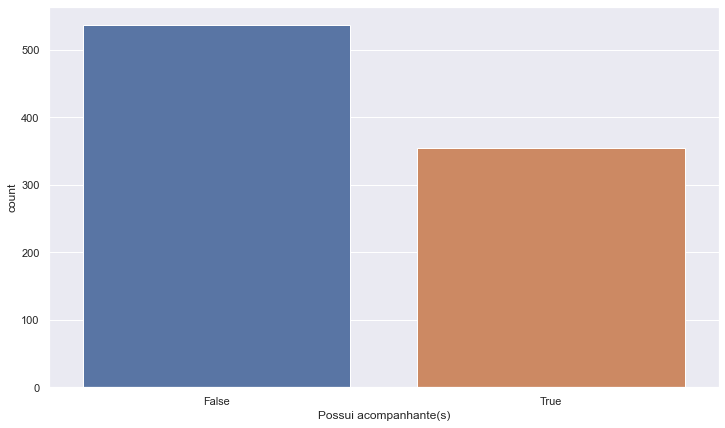

In [12]:
acompanhados = titanic['Relateds'] > 0
sns.countplot(x = acompanhados)
plt.xlabel('Possui acompanhante(s)');

É possível observar que a maior parte não possui acompanhantes, mas que a diferença reduz quando juntamos comparamos com o total de pessoas com pelo menos um acompanhante.

### Andar

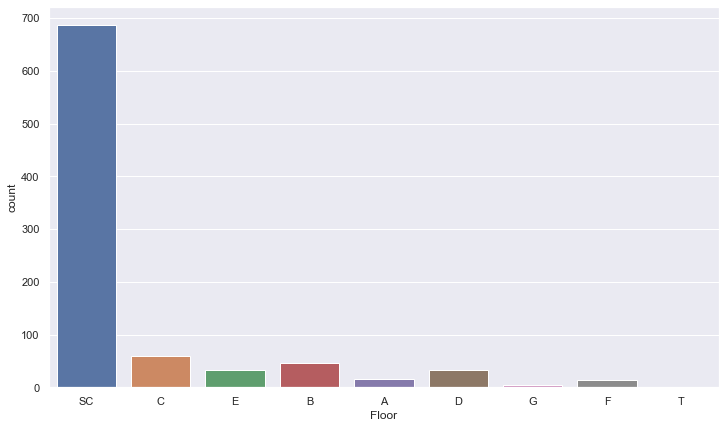

In [13]:
sns.countplot(x='Floor', data=titanic);

A maioria não tinha andar informado, mas dentre os que tinham, a distribuição pode ser melhor vista no gráfico abaixo:

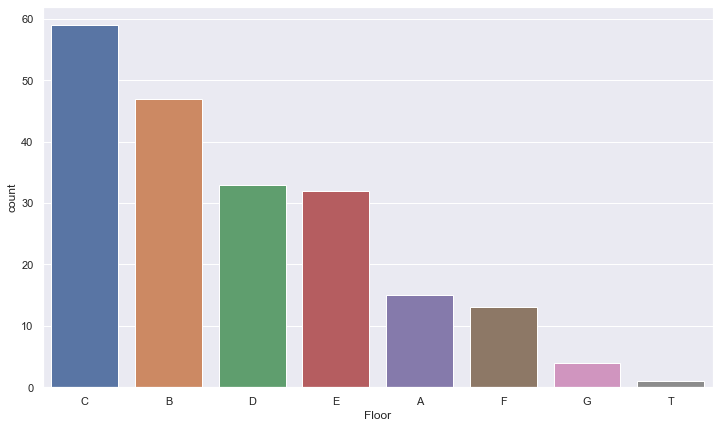

In [14]:
sns.countplot(x='Floor', data=titanic[titanic['Floor'] != 'SC'], order = titanic[titanic['Floor'] != 'SC']['Floor'].value_counts().index);

### Local de embarcação

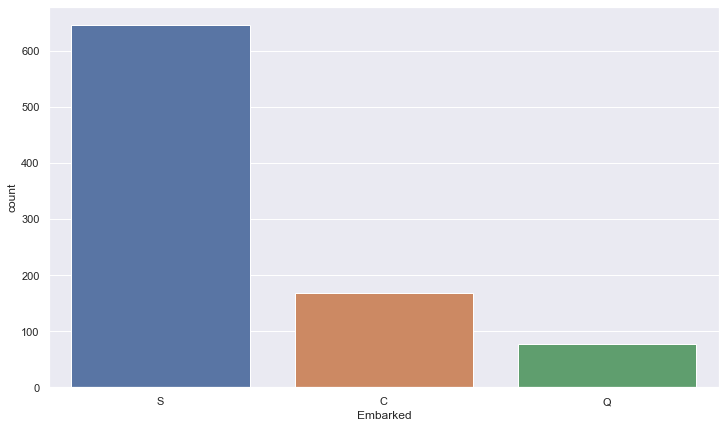

In [15]:
sns.countplot(x='Embarked', data=titanic);

## Análise combinatória: `survived`

Vamos primeiro relembrar a tabela e suas propriedades:

In [16]:
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Floor,Embarked,Relateds,faixa_etaria
0,0,3,male,22,1,0,SC,S,1,jovem_adulto
1,0,3,male,22,0,0,SC,C,0,jovem_adulto
2,0,3,male,22,0,0,SC,S,0,jovem_adulto
3,0,3,male,22,0,0,SC,S,0,jovem_adulto
4,0,3,male,22,0,0,SC,S,0,jovem_adulto


### `Survived` vs `Pclass`

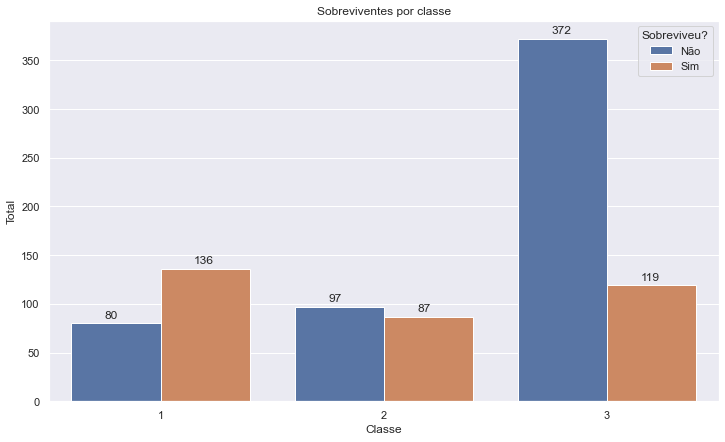

In [17]:
ax = sns.countplot(x = 'Pclass', data=titanic, hue='Survived')
plt.title("Sobreviventes por classe")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('Classe')
plt.ylabel('Total')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))
plt.show();

Um número bastante semelhante sobreviveu em cada classe, mas proporcionalmente a terceira classe foi a que mais pessoas morreram. Portanto é possível afirmar que existe uma relação entre a classe e a sobrevivência, especialmente para a terceira classe. 

### `Survived` vs `Sex`

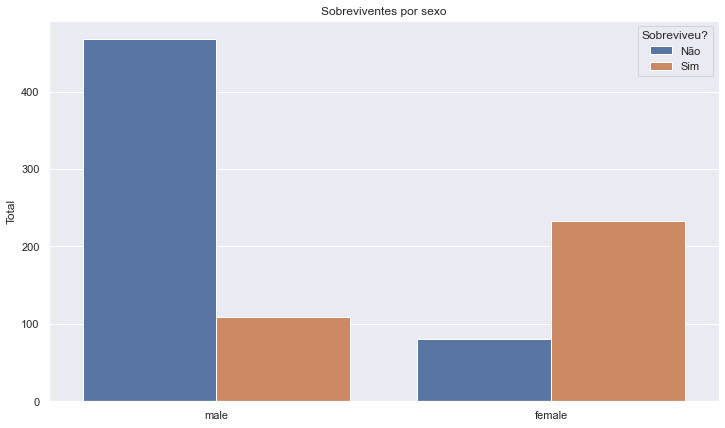

In [18]:
sns.countplot(x = 'Sex', data=titanic, hue='Survived')
plt.title("Sobreviventes por sexo")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('')
plt.ylabel('Total')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))
plt.show();

É notável que tanto proporcionalmente quanto em números absolutos as mulheres sobreviveram muito mais.

`Survived` vs `Sex` vs `Pclass`

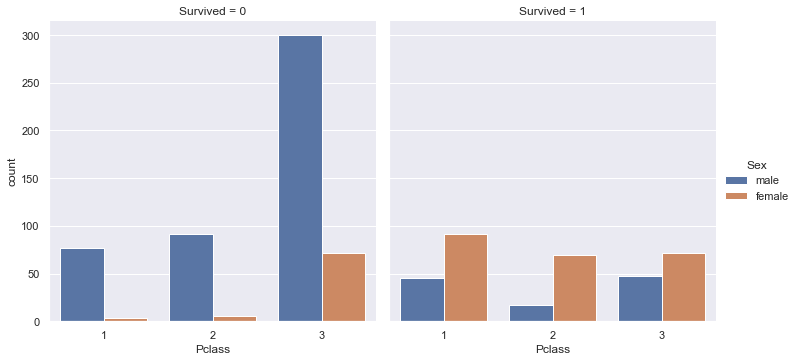

In [19]:
sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=titanic, kind="count");

Em todos os casos a maioria dos que morreram foram homens, existindo certa estabilidade quanto a sobrevivência de mulheres. Com isso, baseado nas análises anteriores de maior presença masculina na terceira classe, o fator predominante para morrer ou não é ser homem ou mulher.

### `Survived` vs `Age`

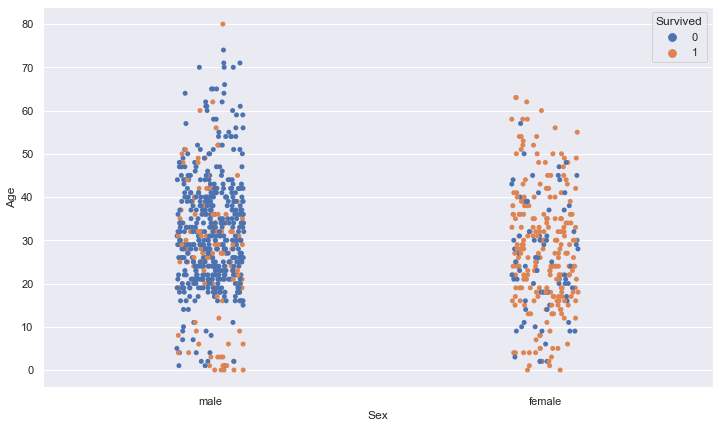

In [20]:
sns.stripplot(y="Age", x="Sex", hue="Survived", data=titanic);

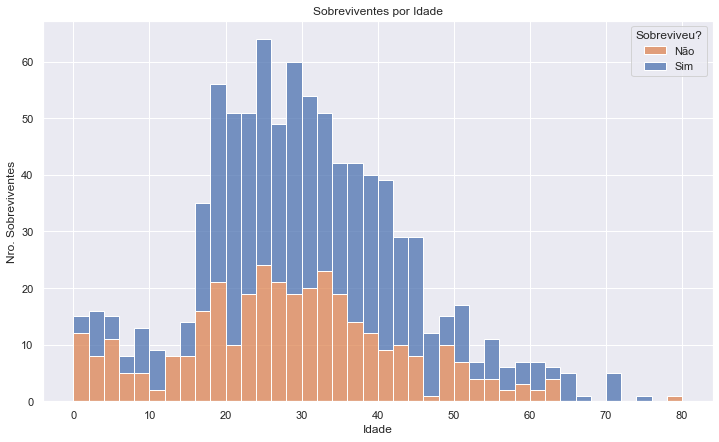

In [21]:
sns.histplot(x='Age', data=titanic, hue='Survived', bins=40, multiple="stack")
plt.title("Sobreviventes por Idade")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('Idade')
plt.ylabel('Nro. Sobreviventes')
plt.show();

Proporcionalmente os mais novos ou mais idosos sobreviveram mais.

### `Survived` vs `faixa_etaria`

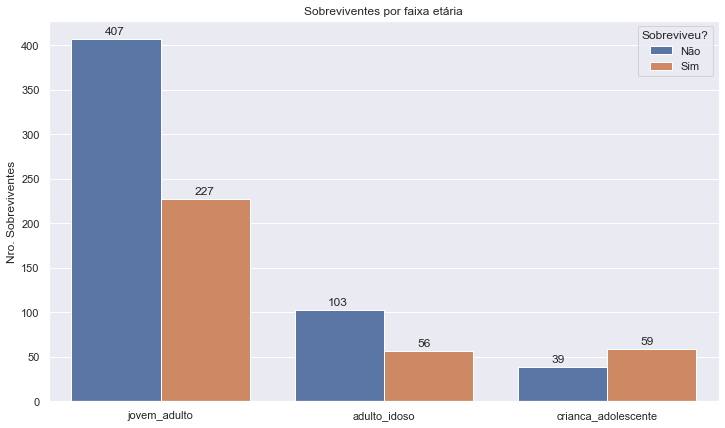

In [22]:
ax = sns.countplot(x = 'faixa_etaria', data=titanic, hue='Survived')
plt.title("Sobreviventes por faixa etária")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('')
plt.ylabel('Nro. Sobreviventes')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))
plt.show();

A proporção de sobreviventes para _jovem_adulto_ e _adulto_idoso_ é semelhante (próximo a 50%), mas crianças adolescentes sobreviveram proporcionalmente bem mais. Até agora tudo parece indicar que uma árvore de decisão é um modelo razoável.

### `Survived` vs `SibSp`

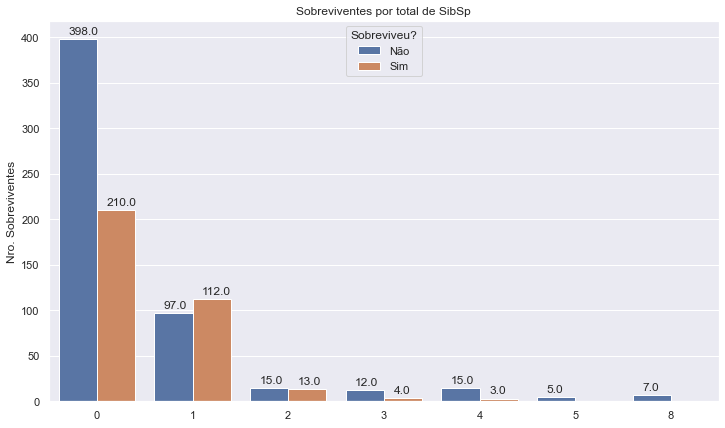

In [25]:
ax = sns.countplot(x = 'SibSp', data=titanic, hue='Survived')
plt.title("Sobreviventes por total de SibSp")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('')
plt.ylabel('Nro. Sobreviventes')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
plt.show();

Será que pessoas com cônjuges ou irmãos têm mais chance de sobreviver? Proporcionalmente aqui parece que sim, mas a base é desbalanceada em favor de pessoas sozinhas.

### `Survived` vs `Parch`

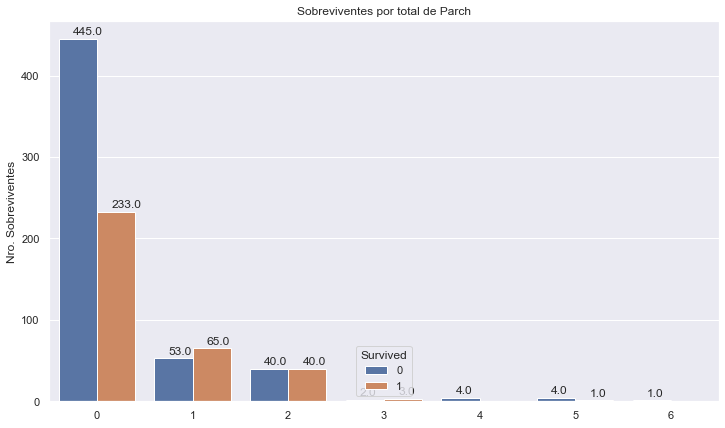

In [29]:
ax = sns.countplot(x = 'Parch', data=titanic, hue='Survived')
plt.title("Sobreviventes por total de Parch")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('')
plt.ylabel('Nro. Sobreviventes')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))
plt.show();

Parece existir uma proporção semelhante ao anterior. E para o somatório das duas?

### `Survived` vs `Relateds`

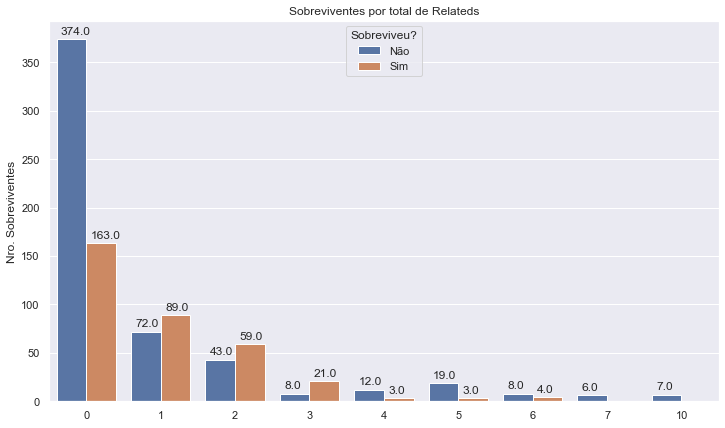

In [33]:
ax = sns.countplot(x = 'Relateds', data=titanic, hue='Survived')
plt.title("Sobreviventes por total de Relateds")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('')
plt.ylabel('Nro. Sobreviventes')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+5))
plt.show();

Realmente parece que aqueles que foram acompanhados (talvez por serem mulheres e crianças) sobreviveram proporcionalmente mais.

### Acompanhados vs Desacompanhados

In [34]:
titanic['acompanhado'] = titanic['Relateds'] > 0
titanic.sample(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Floor,Embarked,Relateds,faixa_etaria,acompanhado
259,0,3,male,24,0,0,SC,S,0,jovem_adulto,False
830,1,1,male,51,0,0,E,S,0,adulto_idoso,False
481,0,3,female,18,2,0,SC,S,2,jovem_adulto,True


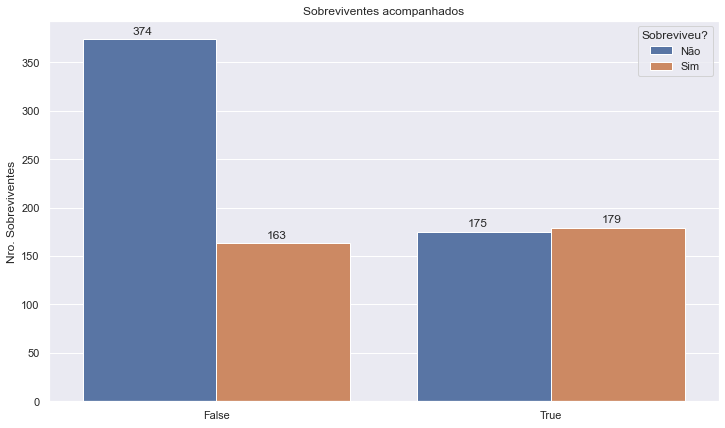

In [37]:
ax = sns.countplot(x = 'acompanhado', data=titanic, hue='Survived')
plt.title("Sobreviventes acompanhados")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('')
plt.ylabel('Nro. Sobreviventes')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))
plt.show();

Em números brutos sobreviveram mais pessoas acompanhadas que desacompanhadas, assim como proporcionalmente. E se eu considerar também junto o sexo?

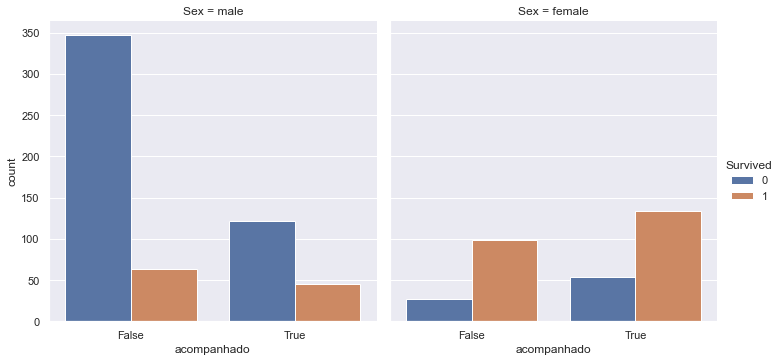

In [38]:
sns.catplot(x="acompanhado", hue="Survived", col="Sex", data=titanic, kind="count");

E por faixa etária?

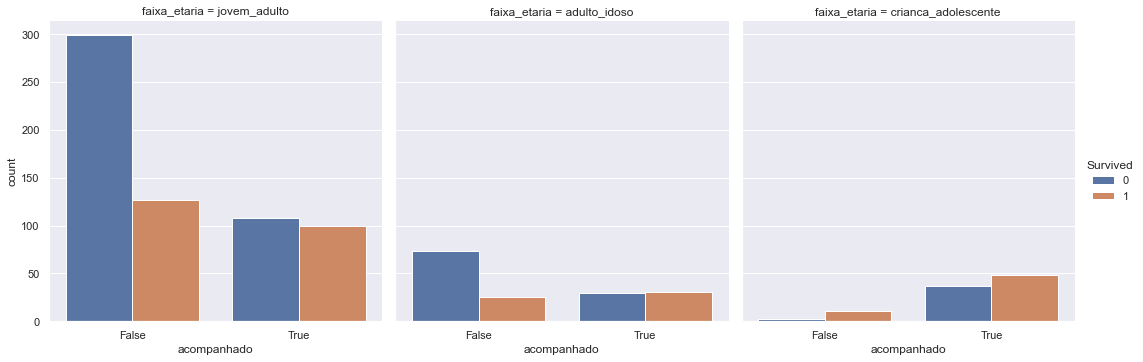

In [39]:
sns.catplot(x="acompanhado", hue="Survived", col="faixa_etaria", data=titanic, kind="count");

Quase não existiam crianças desacompanhadas e a maior parte das crianças, no geral, sobreviveu. A proporção dos mais idosos favoreceu a sobrevivência dos acompanhados, assim como para os jovens adultos. Além disso, ao se incluir o sexo como variável é notável que a maior parte das mulheres está acompanhada e muitos homens estão sozinhos. Então sobreviveram tanto por serem mulheres quanto por estarem acompanhadas? Ou o acompanhado, para este caso, é uma variável _dependente_?

### `Survived` vs `Floor`

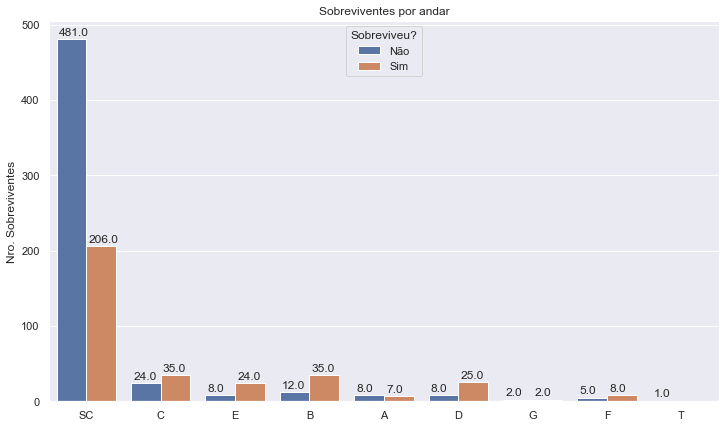

In [41]:
ax = sns.countplot(x = 'Floor', data=titanic, hue='Survived')
plt.title("Sobreviventes por andar")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('')
plt.ylabel('Nro. Sobreviventes')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+5))
plt.show();

O gráfico acima parece mostrar que a maioria dos que possuiam cabine sobreviveram. Para ver melhor, vamos retirar os registros `SC`:

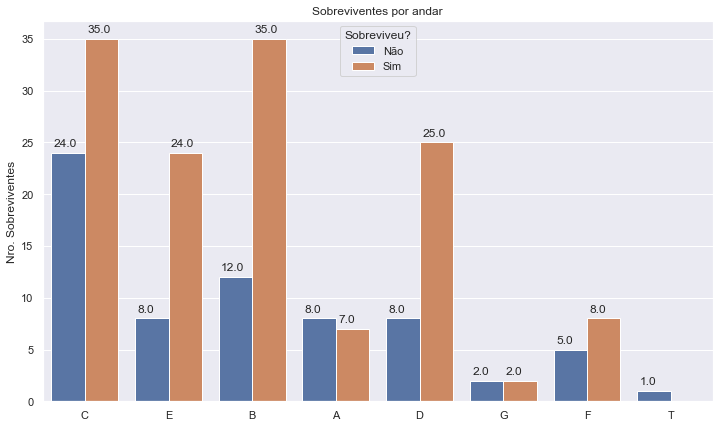

In [44]:
ax = sns.countplot(x = 'Floor', data=titanic.query('Floor != "SC"'), hue='Survived')
plt.title("Sobreviventes por andar")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('')
plt.ylabel('Nro. Sobreviventes')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+0.6))
plt.show();

Realmente, mesmo considerando os andares A, G e T, a chance de sobrevivência dos que possuiam cabine é bem maior. Vamos comparar com e sem cabine:

In [45]:
titanic['possui_cabine'] = titanic['Floor'] != 'SC'
titanic.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Floor,Embarked,Relateds,faixa_etaria,acompanhado,possui_cabine
764,0,3,male,37,0,0,SC,Q,0,jovem_adulto,False,False
248,0,3,male,24,0,0,SC,S,0,jovem_adulto,False,False
632,0,1,male,45,1,0,C,S,1,adulto_idoso,True,True
431,0,3,male,42,0,1,SC,S,1,adulto_idoso,True,False
677,1,1,male,25,1,0,B,C,1,jovem_adulto,True,True


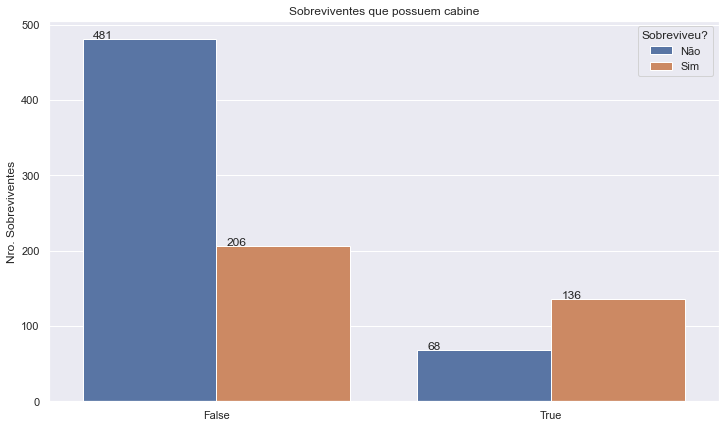

In [47]:
ax = sns.countplot(x = 'possui_cabine', data=titanic, hue='Survived')
plt.title("Sobreviventes que possuem cabine")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('')
plt.ylabel('Nro. Sobreviventes')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+0.6))
plt.show();

Parece que ter uma cabine aumentou a chance de sobrevivência. Podemos lembrar que existe uma relação entre possuir cabine e a classe.

### `Survived` vs `Embarked`

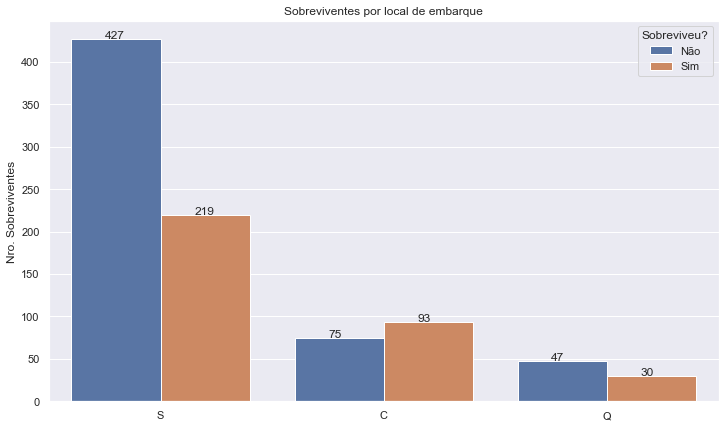

In [50]:
ax = sns.countplot(x = 'Embarked', data=titanic, hue='Survived')
plt.title("Sobreviventes por local de embarque")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('')
plt.ylabel('Nro. Sobreviventes')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.6))
plt.show();

O local de embarque está desbalanceado. Grande parte das pessoas embarcou em _S_ e a maioria não sobreviveu (tanto de _S_ quanto no geral). Em C a maioria sobreviveu mas não em Q. Em nível de "negócio" o porto não parece fazer diferença, especiamlente para aplicar uma árvore de decisão.

## Conclusão

Depois de todo o conhecimento adquirido os modelos de ML que serão gerados podem ter uma precisão melhor. Finalizarei removendo a coluna do local de embarque pois, em nível de negócio, ela n interfere. Dependendo do resultado final do modelo isso pode ser ainda alterado.

In [51]:
del 
titanic.to_csv('../../data/processed/train_processed_byage_ag.csv')